In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('car price data.csv')


In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.shape

(19237, 18)

In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
df.duplicated().sum()

313

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [13]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [14]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

Numerical type columns:
Index(['ID', 'Price', 'Prod. year', 'Airbags'], dtype='object')


In [15]:
df['Levy'] = df['Levy'].replace('-', pd.NA)

In [16]:
median_levy = df['Levy'].dropna().astype(int).median()

In [17]:
df['Levy'] = df['Levy'].fillna(median_levy) #converting to ointeger

In [18]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False)   #removing string part from mileage

In [19]:
df['Mileage'] = df['Mileage'].str.replace(' km', '') #removing km from mile..

In [20]:
df['Drive wheels'] = df['Drive wheels'].replace('4x4', 'All-wheel drive')    # converting 4*4 to all

In [21]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

In [22]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,All-wheel drive,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,All-wheel drive,04-May,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,All-wheel drive,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [23]:
df = df.drop(['ID', 'Doors'], axis = 1)

In [24]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,All-wheel drive,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,All-wheel drive,Left wheel,Black,8
2,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,All-wheel drive,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,781.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4


In [25]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [26]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [27]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Non-Categorical Features: ['Manufacturer', 'Model']
Discrete Features: ['Cylinders', 'Airbags']
Continuous Features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']


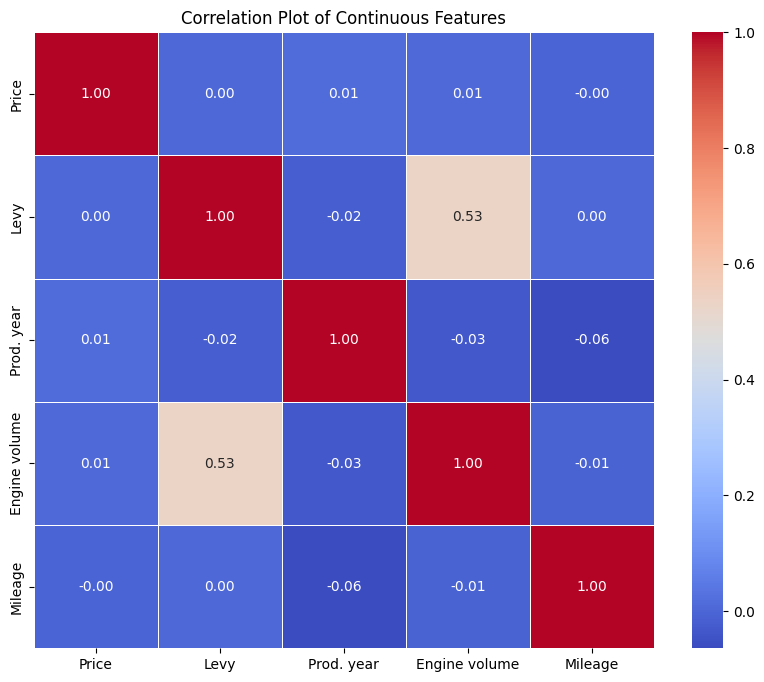

In [28]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [29]:
object_types = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color']

In [30]:
df_dummies = pd.get_dummies(df[object_types])  #one hot coding ...

In [31]:
df_dummies

,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19234,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19235,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)  # after one hot coding .......

In [33]:
df_final = df_final.drop('Model', axis = 1) 

In [34]:
df_final 

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.0,2010,3.5,186005,6.0,12,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,1018.0,2011,3.0,192000,6.0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8467,781.0,2006,1.3,200000,4.0,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.0,2011,2.5,168966,4.0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,446.0,2014,1.3,91901,4.0,4,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,781.0,1999,2.0,300000,4.0,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19233,15681,831.0,2011,2.4,161600,4.0,8,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19234,26108,836.0,2010,2.0,116365,4.0,4,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19235,5331,1288.0,2007,2.0,51258,4.0,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df1 = df_final.copy()

In [36]:
for feature in continuous:                                  #log  pulls outliers closer to the center.
    df1[feature + '_log'] = np.log(df1[feature]+1)        #if the data follows normal distrbu... the model works gud

In [37]:
df1 = df1.drop(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage'], axis = 1)

In [38]:
df1

,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Price_log,Levy_log,Prod. year_log,Engine volume_log,Mileage_log
0,6.0,12,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.497697,7.244228,7.606387,1.504077,12.133534
1,6.0,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,9.718482,6.926577,7.606885,1.386294,12.165256
2,4.0,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,9.044050,6.661855,7.604396,0.832909,12.206078
3,4.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,8.190909,6.760415,7.606885,1.252763,12.037459
4,4.0,4,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.369649,6.102559,7.608374,0.832909,11.428478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,4.0,5,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.044050,6.661855,7.600902,1.098612,12.611541
19233,4.0,8,False,False,False,False,False,False,False,False,...,True,False,False,False,False,9.660269,6.723832,7.606885,1.223775,11.992886
19234,4.0,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,10.170035,6.729824,7.606387,1.098612,11.664496
19235,4.0,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,8.581482,7.161622,7.604894,1.098612,10.844646


In [39]:
X = df1.drop('Price_log', axis = 1)
y = df1['Price_log']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr_model = LinearRegression()  lr.fit(x_train,y_train)
lr_model.fit(X_train, y_train)

LinearRegression()

In [43]:

y_pred = lr_model.predict(X_test)


In [44]:
y_pred_train = lr_model.predict(X_train)

In [45]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.90935643256687


In [46]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.024482488763457e+18


In [47]:
df1

,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Price_log,Levy_log,Prod. year_log,Engine volume_log,Mileage_log
0,6.0,12,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.497697,7.244228,7.606387,1.504077,12.133534
1,6.0,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,9.718482,6.926577,7.606885,1.386294,12.165256
2,4.0,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,9.044050,6.661855,7.604396,0.832909,12.206078
3,4.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,8.190909,6.760415,7.606885,1.252763,12.037459
4,4.0,4,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.369649,6.102559,7.608374,0.832909,11.428478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,4.0,5,False,False,False,False,False,False,False,False,...,False,True,False,False,False,9.044050,6.661855,7.600902,1.098612,12.611541
19233,4.0,8,False,False,False,False,False,False,False,False,...,True,False,False,False,False,9.660269,6.723832,7.606885,1.223775,11.992886
19234,4.0,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,10.170035,6.729824,7.606387,1.098612,11.664496
19235,4.0,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,8.581482,7.161622,7.604894,1.098612,10.844646


In [48]:
print(df1.columns)

Index(['Cylinders', 'Airbags', 'Manufacturer_ACURA', 'Manufacturer_ALFA ROMEO',
       'Manufacturer_ASTON MARTIN', 'Manufacturer_AUDI',
       'Manufacturer_BENTLEY', 'Manufacturer_BMW', 'Manufacturer_BUICK',
       'Manufacturer_CADILLAC',
       ...
       'Color_Red', 'Color_Silver', 'Color_Sky blue', 'Color_White',
       'Color_Yellow', 'Price_log', 'Levy_log', 'Prod. year_log',
       'Engine volume_log', 'Mileage_log'],
      dtype='object', length=117)
